# EDA, Feature Engineering, and AutoML

In this lab, we will apply learned concepts from Day 3-4 lectures to perform data exploration, feature engineering, and autoML on a house sale dataset.

The goal of this assignment is to analyze 3 years’(2018-2020) house sales data provided by New York City (NYC) goverment and build regression model to predict house price. NYC has five boroughs, i.e., Bronx, Brooklyn, Manhattan, Queens and Staten Island. Sales of houses in each borough has been provided.


**Submission: submit via onq.** 


In [ ]:
# install Some of libraries
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

In [ ]:
pip install --force-reinstall package_with_metadata_issue

In [ ]:
!pip install --upgrade scipy

In [ ]:
# Import needed libraries. E.g., pandas, missingno, and sklearn

# (for mathematical operations) used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
import numpy as np
import pandas as pd

# Import libraries
import glob

# (for data visualization) for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt   
import seaborn as sns

# provides a series of visualisations to understand the presence and distribution of missing data within data. we can identify where missing values occur, the extent of the missingness and whether any of the missing values are correlated with each other.
import missingno as msno

from datetime import datetime, date

from sklearn.impute import KNNImputer

# For conver categorical data to numerical data
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import sklearn.datasets
import sklearn.metrics

import autosklearn.regression

from autosklearn.regression import AutoSklearnRegressor
from sklearn.linear_model import LinearRegression

from scipy import stats

# saves from multiple prints and display statements,
# will let you see multiple outputs in the same cell
# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore the warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# # connect to google drive
# from google.colab import drive
# drive.mount('/content/drive')

Task 1: Read dataset, merge data, and  perform basic data exploration. Note, you should briefely discuss the quality of dataset (missing values, duplicate entries, etc.) Also, in task 3, you would be asked to perform prediction on house sale price, thus it would be good to consider outliers related to this prediciton task when you perform data cleaning.

In [ ]:
# Get CSV files list from a folder
# path = '/content/drive/MyDrive/Data Analysis/Labs/Lab 2'
path = '../input/da-lab-2-data'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df   = pd.concat(df_list, ignore_index=True)

In [ ]:
# # load files and read them from google drive
# df_bronx_18 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2018_bronx.csv')
# df_brooklyn_18 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2018_brooklyn.csv')
# df_manhattan_18 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2018_manhattan.csv')
# df_queens_18 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2018_queens.csv')
# df_statenisland_18 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2018_statenisland.csv')
# df_bronx_19 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2019_bronx.csv')
# df_brooklyn_19 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2019_brooklyn.csv')
# df_manhattan_19 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2019_manhattan.csv')
# df_queens_19 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2019_queens.csv')
# df_statenisland_19 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2019_statenisland.csv')
# df_bronx_20 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2020_bronx.csv')
# df_brooklyn_20 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2020_brooklyn.csv')
# df_manhattan_20 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2020_manhattan.csv')
# df_queens_20 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2020_queens.csv')
# df_statenisland_20 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/Lab 2/2020_statenisland.csv')

In [ ]:
# # load files and read them from Kaggle
# df_bronx_18 = pd.read_csv('../input/da-lab-2-data/2018_bronx.csv')
# df_brooklyn_18 = pd.read_csv('../input/da-lab-2-data/2018_brooklyn.csv')
# df_manhattan_18 = pd.read_csv('../input/da-lab-2-data/2018_manhattan.csv')
# df_queens_18 = pd.read_csv('../input/da-lab-2-data/2018_queens.csv')
# df_statenisland_18 = pd.read_csv('../input/da-lab-2-data/2018_statenisland.csv')
# df_bronx_19 = pd.read_csv('../input/da-lab-2-data/2019_bronx.csv')
# df_brooklyn_19 = pd.read_csv('../input/da-lab-2-data/2019_brooklyn.csv')
# df_manhattan_19 = pd.read_csv('../input/da-lab-2-data/2019_manhattan.csv')
# df_queens_19 = pd.read_csv('../input/da-lab-2-data/2019_queens.csv')
# df_statenisland_19 = pd.read_csv('../input/da-lab-2-data/2019_statenisland.csv')
# df_bronx_20 = pd.read_csv('../input/da-lab-2-data/2020_bronx.csv')
# df_brooklyn_20 = pd.read_csv('../input/da-lab-2-data/2020_brooklyn.csv')
# df_manhattan_20 = pd.read_csv('../input/da-lab-2-data/2020_manhattan.csv')
# df_queens_20 = pd.read_csv('../input/da-lab-2-data/2020_queens.csv')
# df_statenisland_20 = pd.read_csv('../input/da-lab-2-data/2020_statenisland.csv')

In [ ]:
# # Create list from the DataFrames 
# frames = [df_bronx_18, df_brooklyn_18, df_manhattan_18, df_queens_18, df_statenisland_18, df_bronx_19, df_brooklyn_19, df_manhattan_19, df_queens_19, df_statenisland_19, df_bronx_20, df_brooklyn_20, df_manhattan_20, df_queens_20, df_statenisland_20]
# # concat (merge) the Frames
# df = pd.concat(frames)
# # Show the Data 
# df

In [ ]:
from pandas.io.parsers.readers import read_csv
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
# Save the data to file 
df.to_csv('data_lab_2.csv', index= False)


# df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Labs/data_lab_2.csv')
df = pd.read_csv('./data_lab_2.csv')

In [ ]:
# Show the Dimension of the data 
df.shape

(277803, 21)

In [ ]:
# convert the upper case of the column's name to lower case
df.columns= df.columns.str.lower()
# remove space and add _ character for ease of processing 
df.columns = df.columns.str.replace(' ', '_')
# show the column's name 
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease-ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

In [ ]:
# convert the upper case of this column's values to lower case
df[['neighborhood', 'building_class_category', 'address']] = df[['neighborhood', 'building_class_category', 'address']].apply(lambda x:x.str.lower())
# Show the data
df

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,4.0,airport la guardia,01 one family dwellings,1,949.0,31.0,NaN,A5,1942 81st street,NaN,...,1.0,0.0,1.0,"1,800","1,224",1945.0,1.0,A5,"775,000",2019-04-05
1,4.0,airport la guardia,01 one family dwellings,1,949.0,38.0,NaN,A5,19-56 81st street,NaN,...,1.0,0.0,1.0,"1,800","1,224",1945.0,1.0,A5,0,2019-06-18
2,4.0,airport la guardia,01 one family dwellings,1,949.0,41.0,NaN,A5,1962 81st street,NaN,...,1.0,0.0,1.0,"1,800","1,224",1945.0,1.0,A5,0,2019-11-21
3,4.0,airport la guardia,01 one family dwellings,1,949.0,41.0,NaN,A5,1962 81st st,NaN,...,1.0,0.0,1.0,"1,800","1,224",1945.0,1.0,A5,0,2019-11-12
4,4.0,airport la guardia,01 one family dwellings,1,976.0,12.0,NaN,A5,2114 81 street,NaN,...,1.0,0.0,1.0,"1,800","1,224",1950.0,1.0,A5,0,2019-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Show the some of information to columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277803 entries, 0 to 277802
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   borough                         230659 non-null  float64
 1   neighborhood                    230659 non-null  object 
 2   building_class_category         230659 non-null  object 
 3   tax_class_at_present            230386 non-null  object 
 4   block                           230659 non-null  float64
 5   lot                             230659 non-null  float64
 6   ease-ment                       0 non-null       float64
 7   building_class_at_present       230386 non-null  object 
 8   address                         230659 non-null  object 
 9   apartment_number                50782 non-null   object 
 10  zip_code                        230642 non-null  float64
 11  residential_units               199734 non-null  object 
 12  commercial_units

In [ ]:
# Show the some of information to rows in the data
df.describe(include='all')

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
count,230659.000000,230659,230659,230386,230659.000000,230659.000000,0.0,230386,230659,50782,...,199734.0,189268.0,201363.0,187638,187639,220373.000000,230659.000000,230659,230659,230659
unique,NaN,254,46,10,NaN,NaN,NaN,179,207574,7590,...,433.0,143.0,460.0,10040,9604,NaN,NaN,332,24205,1095
top,NaN,flushing-north,01 one family dwellings,1,NaN,NaN,NaN,D4,401 east 60th street,4,...,1.0,0.0,1.0,0,0,NaN,NaN,D4,0,2019-08-15
freq,NaN,6995,53382,111132,NaN,NaN,NaN,34271,97,861,...,69887.0,146566.0,76361.0,46025,42094,NaN,NaN,21883,47129,909
mean,3.019045,NaN,NaN,NaN,4422.239262,357.502035,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1892.753795,1.619104,NaN,NaN,NaN
std,1.274595,NaN,NaN,NaN,3655.509089,653.040020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,332.153910,0.801899,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN
25%,2.000000,NaN,NaN,NaN,1366.000000,22.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1921.000000,1.000000,NaN,NaN,NaN
50%,3.000000,NaN,NaN,NaN,3558.000000,49.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1941.000000,1.000000,NaN,NaN,NaN
75%,4.000000,NaN,NaN,NaN,6574.000000,316.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1970.000000,2.000000,NaN,NaN,NaN


In [ ]:
# Show the count of duplicate rows in the data
df.duplicated().sum()

47910

In [ ]:
# Drop the duplicate rows in the data
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
# Show the count of duplicate rows in the data
df.duplicated().sum()

0

In [ ]:
# Show the Dimension of the data 
df.shape

(229198, 21)

In [ ]:
# get the count of unique values from the data
df.nunique().sort_values(ascending= False)

address                           207062
sale_price                         24182
block                              13075
land_square_feet                   10010
gross_square_feet                   9575
apartment_number                    7581
lot                                 3901
sale_date                           1095
total_units                          456
residential_units                    428
building_class_at_time_of_sale       332
neighborhood                         254
zip_code                             194
year_built                           188
building_class_at_present            179
commercial_units                     143
building_class_category               46
tax_class_at_present                  10
borough                                5
tax_class_at_time_of_sale              3
ease-ment                              0
dtype: int64

In [ ]:
# Show the count of the null values in the data
df.isnull().sum().sort_values(ascending= False)

ease-ment                         229198
apartment_number                  178721
land_square_feet                   42911
gross_square_feet                  42910
commercial_units                   41281
residential_units                  30833
total_units                        29204
year_built                         10264
tax_class_at_present                 273
building_class_at_present            273
zip_code                              17
sale_price                             0
building_class_at_time_of_sale         0
tax_class_at_time_of_sale              0
borough                                0
neighborhood                           0
address                                0
lot                                    0
block                                  0
building_class_category                0
sale_date                              0
dtype: int64

<AxesSubplot:>

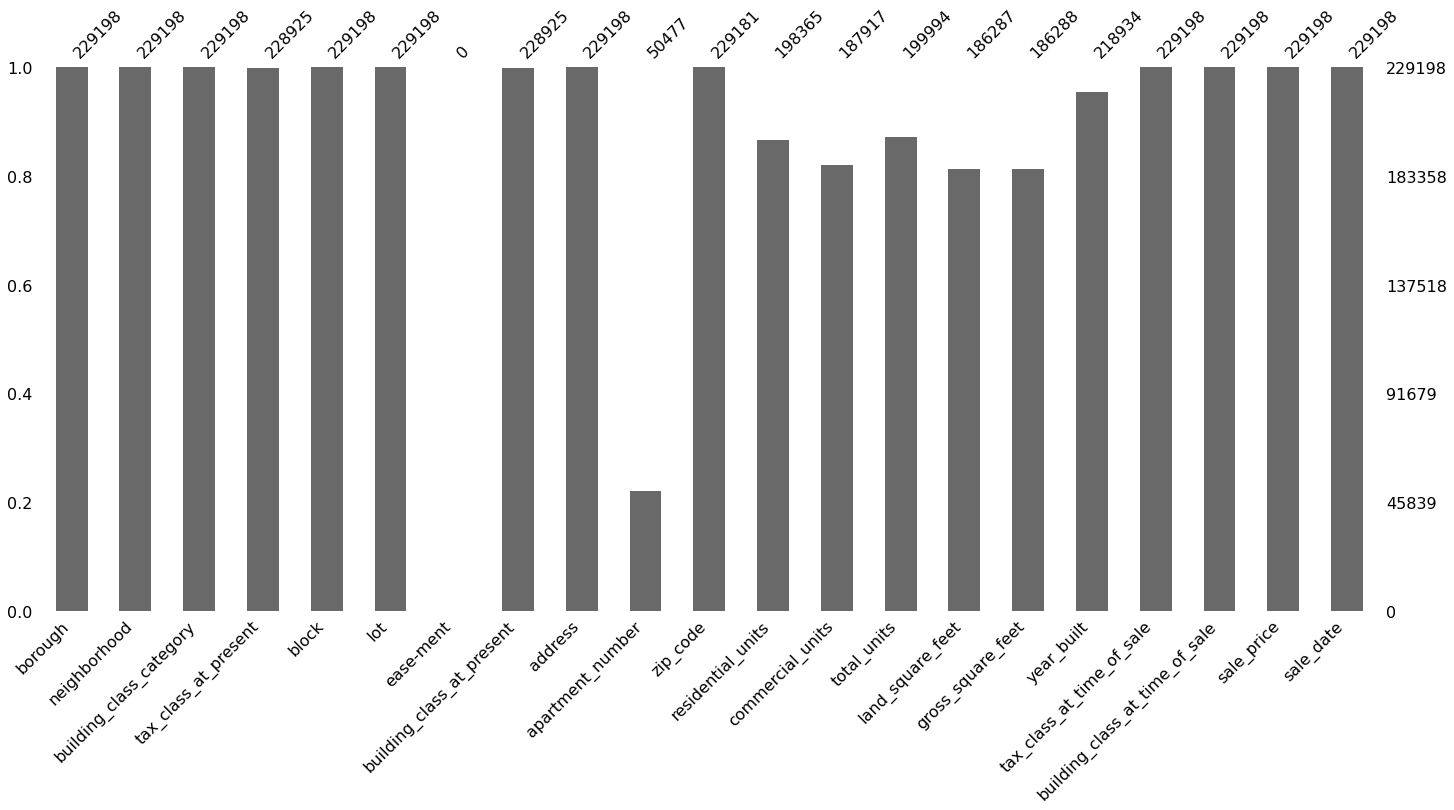

In [ ]:
# (bar chart) provides a simple plot where each bar represents a column within the data. The height of the bar indicates how complete that column
msno.bar(df)

<AxesSubplot:>

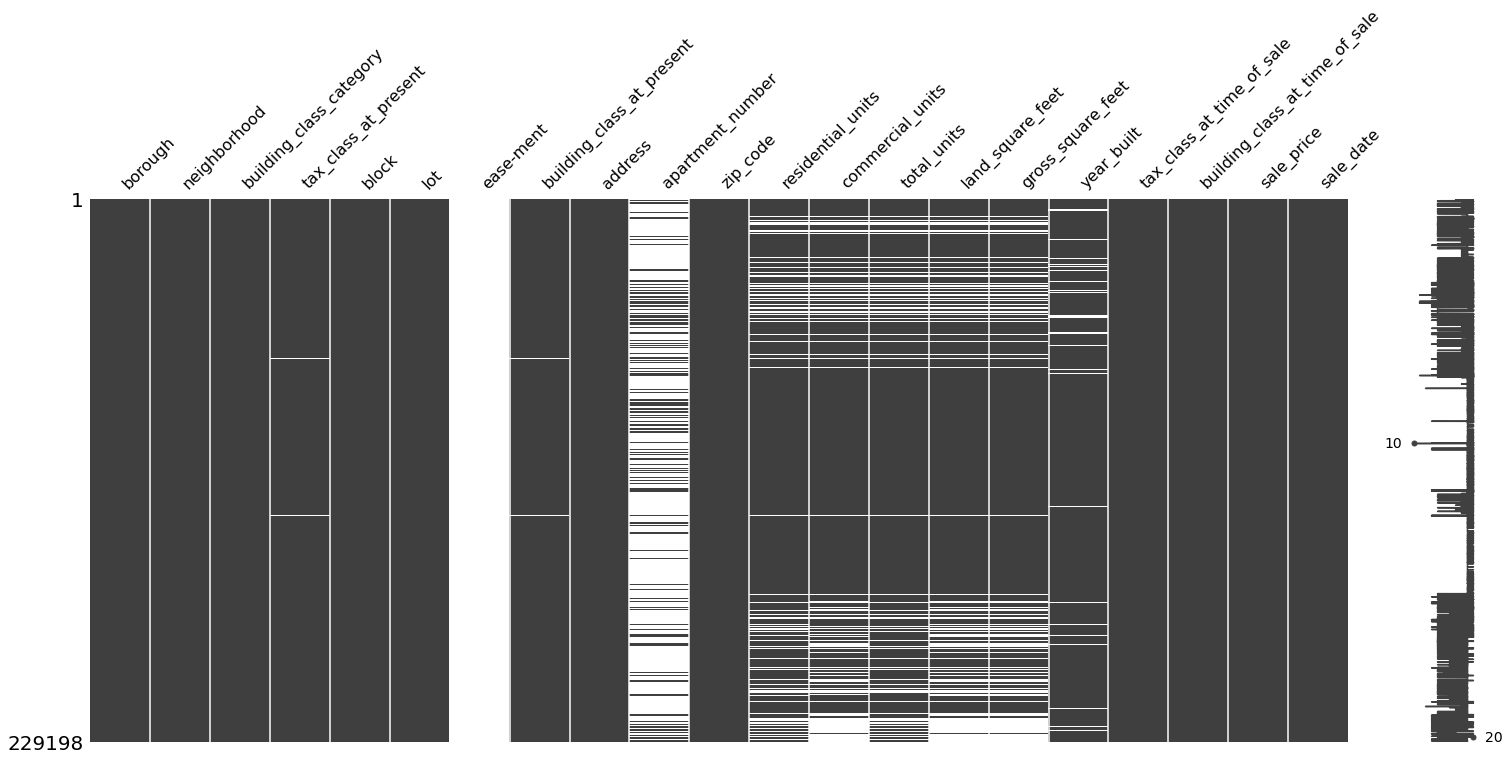

In [ ]:
# visualize missing values as a matrix
msno.matrix(df)

In [ ]:
# show the count of null values in the data. if the data has null values, it will return the count of null in all columns otherwise it will return 0
total_miss = df.isnull().sum()
# Calclate the persange of null values in the data
percent_miss = (total_miss/df.isnull().count()*100)

# create data frame from the total null values and percentage it
missing_data = pd.DataFrame({'Total missing':total_miss,'missing %':percent_miss})
# Sort the data frame that has the total null values and percentage it
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,missing %
ease-ment,229198,100.000000
apartment_number,178721,77.976684
land_square_feet,42911,18.722240
gross_square_feet,42910,18.721804
commercial_units,41281,18.011065
residential_units,30833,13.452561
total_units,29204,12.741821
year_built,10264,4.478224
tax_class_at_present,273,0.119111
building_class_at_present,273,0.119111


In [ ]:
# Delete the ease-ment column from the dataset to doesn't have the values.
df.drop('ease-ment', inplace= True, axis= 1)

**Finding:**

* I have 15 dataset. So, I marge the data set in one the data.
* The dimension of the dataset is 277803 rows and 21 columns.
* The column's names are upper case. so, I change them to lower case.
* Some of columns' values have upper case. so, I change them to lower case. This columns' name are neighborhood, building class category and address.
* The dataset contains 7 columns' data type are float and 14 columns' data type are object.
* The dataset contain duplicate rows. 
* The count of duplicate rows are 47910. So, I dropped this rows to clean the data.
* I get the count of unique values for each column. the maxizume count of unique is 207062 values and the minimume count of unique is 0.
* The column's name doesn't contain any values that this column's name is ease-ment. So, I will delete this column.
* The dataset has null values. 
* The maxizume count of null values is 178721 that the column's name is apartment number and the minimume count of null values is 17 that the column's name is zip code.

In [ ]:
# # Take copy from the dataset.
# data = df.copy()

***
***
***
***
***
***

In [ ]:
for all_data in df:
    print('========================================', all_data, '===============================================================')
    print('Uniques values: \n', df[all_data].unique())
    print('--------------------------------------------------------------------------------------------------------')
    print('Values and Count the Uniques values: \n', df[all_data].value_counts())
    print('--------------------------------------------------------------------------------------------------------')
    print('Data Type of this column: \n', df[all_data].dtype)
    print('**********************************************************************************************************************')

======================================== borough ===============================================================
Uniques values: 
 [4. 2. 1. 3. 5.]
--------------------------------------------------------------------------------------------------------
Values and Count the Uniques values: 
 4.0    72809
3.0    64936
1.0    46251
5.0    23140
2.0    22062
Name: borough, dtype: int64
--------------------------------------------------------------------------------------------------------
Data Type of this column: 
 float64
**********************************************************************************************************************
======================================== neighborhood ===============================================================
Uniques values: 
 ['airport la guardia' 'arverne' 'astoria' 'bayside' 'beechhurst'
 'belle harbor' 'bellerose' 'breezy point' 'briarwood' 'broad channel'
 'cambria heights' 'college point' 'corona' 'douglaston' 'east elmhurst'
 'elmhurst

***
***
***
***
***
***

***

**Borough Column**

The class 1 is Manhattan, the class 2 is Bronx, the class 3 is Brooklyn, the class 4 is Queens and the class 5 is Staten Island.

In [ ]:
# Replace the values of borough to Manhattan, Bronx, Brooklyn, Queens and Staten Island.
df.borough = df.borough.map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [ ]:
# get the unique values and counts them for borough of column from the data 
df.borough.value_counts().sort_values(ascending = False)

Queens           72809
Brooklyn         64936
Manhattan        46251
Staten Island    23140
Bronx            22062
Name: borough, dtype: int64

**Finding:**
* This column is clean.
* This column doesn't have the null values.
* The column's data type is float and Its values are 1.0, 2.0, 3.0, 4.0. So, I will change it to Manhattan, Bronx, Brooklyn, Queens and Staten Island.
* The most of number's repeatingborough in this column is Queens values. the number of repeating is 72809.

***

**Neighborhood Column**

In [ ]:
# get the unique values and counts them for neighborhood of column from the data 
df.neighborhood.value_counts().sort_values(ascending = False)

flushing-north              6957
upper east side (59-79)     4628
upper west side (59-79)     4130
upper east side (79-96)     4043
bedford stuyvesant          3860
                            ... 
bloomfield                    15
bronx park                    13
city island-pelham strip       6
fresh kills                    3
airport jfk                    1
Name: neighborhood, Length: 254, dtype: int64

**Finding:**
* This column is clean.
* This column doesn't have the null values.
* The column's data type is object.
* The most of number's repeating neighborhood in this column is flushing-north. the number of repeating is 6957.

***

**Building Class Category Column**

In [ ]:
# Remove the first three character from the values and remove the space in the first text in this column 
df.building_class_category = df.building_class_category.str[3:].apply(lambda x: x.strip())

In [ ]:
# get the unique values and counts them for building_class_category of column from the data 
df.building_class_category.value_counts().sort_values(ascending = False)

one family dwellings                       53152
two family dwellings                       44724
coops - elevator apartments                34705
condos - elevator apartments               32030
three family dwellings                     12614
rentals - walkup apartments                 8269
coops - walkup apartments                   7232
tax class 1 condos                          4522
condos - 2-10 unit residential              4004
condo parking                               3494
tax class 1 vacant land                     3003
condo coops                                 2970
condos - walkup apartments                  2705
store buildings                             2566
rentals - 4-10 unit                         1640
commercial garages                          1570
rentals - elevator apartments               1219
commercial vacant land                      1046
office buildings                            1035
condo office buildings                       948
condo non-business s

**Finding:**
* This column is clean.
* This column doesn't have the null values.
* The column's data type is object.
* The most of number's repeating building_class_category in this column is one family dwellings. the number of repeating is 53152.
* I will remove the first three characters from the values and remove the space from the first text in this column

***

**Tax Class At Present Column**

In [ ]:
# Show the unique values of building_class_category by using tax_class_at_present
print('****************************** 1 **********************************************')
df[df.tax_class_at_present.isin(['1'])].building_class_category.value_counts()
print('\n ****************************** 2 **********************************************')
df[df.tax_class_at_present.isin(['2'])].building_class_category.value_counts()
print('\n ****************************** 4 **********************************************')
df[df.tax_class_at_present.isin(['4'])].building_class_category.value_counts()
print('\n ****************************** 1A **********************************************')
df[df.tax_class_at_present.isin(['1A'])].building_class_category.value_counts()
print('\n ****************************** 2A **********************************************')
df[df.tax_class_at_present.isin(['2A'])].building_class_category.value_counts()
print('\n ****************************** 1B **********************************************')
df[df.tax_class_at_present.isin(['1B'])].building_class_category.value_counts()
print('\n ****************************** 2B **********************************************')
df[df.tax_class_at_present.isin(['2B'])].building_class_category.value_counts()
print('\n ****************************** 1C **********************************************')
df[df.tax_class_at_present.isin(['1C'])].building_class_category.value_counts()
print('\n ****************************** 2C **********************************************')
df[df.tax_class_at_present.isin(['2C'])].building_class_category.value_counts()
print('\n ****************************** 1D **********************************************')
df[df.tax_class_at_present.isin(['1D'])].building_class_category.value_counts()

****************************** 1 **********************************************


one family dwellings             52635
two family dwellings             44677
three family dwellings           12590
tax class 1 - other                457
tax class 1 vacant land            116
rentals - walkup apartments         18
store buildings                      6
religious facilities                 3
commercial garages                   2
office buildings                     2
rentals - 4-10 unit                  1
coops - walkup apartments            1
rentals - elevator apartments        1
commercial vacant land               1
Name: building_class_category, dtype: int64


 ****************************** 2 **********************************************


coops - elevator apartments               34533
condos - elevator apartments              31806
coops - walkup apartments                  5968
condo coops                                2921
condos - walkup apartments                 2679
rentals - walkup apartments                1893
rentals - elevator apartments              1121
special condo billing lots                  183
condo-rentals                                22
tax class 1 condos                           13
commercial vacant land                       13
tax class 1 vacant land                      11
condo cultural/medical/educational/etc        7
commercial garages                            5
condo parking                                 3
store buildings                               3
factories                                     2
religious facilities                          1
rentals - 4-10 unit                           1
one family dwellings                          1
hospital and health facilities          


 ****************************** 4 **********************************************


condo parking                              3476
store buildings                            2553
commercial garages                         1555
office buildings                           1032
commercial vacant land                     1022
condo office buildings                      947
condo non-business storage                  924
warehouses                                  846
factories                                   513
condo store buildings                       451
tax class 4 - other                         387
religious facilities                        344
condo hotels                                251
educational facilities                      155
commercial condos                           147
hospital and health facilities              133
other hotels                                118
indoor public and cultural facilities        90
condo cultural/medical/educational/etc       71
condo terraces/gardens/cabanas               63
asylums and homes                       


 ****************************** 1A **********************************************


tax class 1 condos                4016
condos - walkup apartments          19
condos - 2-10 unit residential       5
condos - elevator apartments         2
Name: building_class_category, dtype: int64


 ****************************** 2A **********************************************


rentals - walkup apartments      4881
rentals - 4-10 unit              1319
rentals - elevator apartments      28
three family dwellings              9
commercial vacant land              3
two family dwellings                2
one family dwellings                2
tax class 1 vacant land             2
store buildings                     1
Name: building_class_category, dtype: int64


 ****************************** 1B **********************************************


tax class 1 vacant land          2855
one family dwellings               75
two family dwellings               34
three family dwellings              9
commercial garages                  8
religious facilities                7
commercial vacant land              7
tax class 1 - other                 5
tax class 4 - other                 3
rentals - elevator apartments       3
rentals - walkup apartments         2
store buildings                     2
rentals - 4-10 unit                 1
factories                           1
warehouses                          1
Name: building_class_category, dtype: int64


 ****************************** 2B **********************************************


rentals - walkup apartments      1472
rentals - 4-10 unit               313
rentals - elevator apartments      63
tax class 1 vacant land             7
two family dwellings                7
three family dwellings              5
one family dwellings                1
factories                           1
religious facilities                1
store buildings                     1
Name: building_class_category, dtype: int64


 ****************************** 1C **********************************************


tax class 1 condos    485
Name: building_class_category, dtype: int64


 ****************************** 2C **********************************************


condos - 2-10 unit residential             3969
coops - walkup apartments                  1263
condos - 2-10 unit with commercial unit     248
coops - elevator apartments                 172
condo coops                                  49
special condo billing lots                   10
condos - walkup apartments                    7
condos - elevator apartments                  6
condo non-business storage                    4
condo-rentals                                 4
tax class 1 condos                            4
condo parking                                 4
commercial condos                             1
Name: building_class_category, dtype: int64


 ****************************** 1D **********************************************


one family dwellings    434
Name: building_class_category, dtype: int64

In [ ]:
# get the unique values and counts them for tax_class_at_present of column from the data 
df.tax_class_at_present.unique()

array(['1', '2A', '2', '1A', '1B', '4', '2B', '2C', '1D', '1C', nan],
      dtype=object)

In [ ]:
# Chage the values of tax_class_at_present to class 1, class 2 and class 4
df.loc[df.building_class_category.isin(['one family dwellings', 'two family dwellings', 'three family dwellings', 'rentals - walkup apartments', 'tax class 1 vacant land', 'store buildings', 'rentals - 4-10 unit', 'rentals - elevator apartments', 'commercial vacant land']), 'tax_class_at_present'] = 1
df.loc[df.building_class_category.isin(['coops - elevator apartments', 'condos - elevator apartments', 'coops - walkup apartments', 'condos - walkup apartments', 'loft buildings', 'condos - 2-10 unit residential', 'tax class 1 condos', 'condo parking', 'condo coops', 'condo non-business storage', 'condo store buildings', 'condos - 2-10 unit with commercial unit', 'condo hotels', 'special condo billing lots', 'commercial condos', 'condo cultural/medical/educational/etc', 'condo terraces/gardens/cabanas', 'condo warehouses/factory/indus', 'condo-rentals']), 'tax_class_at_present'] = 2
df.loc[df.building_class_category.isin(['commercial garages', 'office buildings', 'condo office buildings', 'warehouses', 'factories', 'tax class 1 - other', 'tax class 4 - other', 'religious facilities', 'educational facilities', 'hospital and health facilities', 'other hotels', 'indoor public and cultural facilities', 'asylums and homes', 'luxury hotels', 'outdoor recreational facilities', 'theatres', 'transportation facilities', 'selected governmental facilities']), 'tax_class_at_present'] = 4

In [ ]:
# get the unique values and counts them for tax_class_at_present of column from the data 
df.tax_class_at_present.unique()

array([1, 2, 4], dtype=object)

In [ ]:
print('****************************** 1 **********************************************')
df[df.tax_class_at_present.isin([1])].building_class_category.value_counts()
print('\n ****************************** 2 **********************************************')
df[df.tax_class_at_present.isin([2])].building_class_category.value_counts()
print('\n ****************************** 4 **********************************************')
df[df.tax_class_at_present.isin([4])].building_class_category.value_counts()

****************************** 1 **********************************************


one family dwellings             53152
two family dwellings             44724
three family dwellings           12614
rentals - walkup apartments       8269
tax class 1 vacant land           3003
store buildings                   2566
rentals - 4-10 unit               1640
rentals - elevator apartments     1219
commercial vacant land            1046
Name: building_class_category, dtype: int64


 ****************************** 2 **********************************************


coops - elevator apartments                34705
condos - elevator apartments               32030
coops - walkup apartments                   7232
tax class 1 condos                          4522
condos - 2-10 unit residential              4004
condo parking                               3494
condo coops                                 2970
condos - walkup apartments                  2705
condo non-business storage                   929
condo store buildings                        454
condos - 2-10 unit with commercial unit      259
condo hotels                                 251
special condo billing lots                   195
commercial condos                            149
condo cultural/medical/educational/etc        79
condo terraces/gardens/cabanas                63
loft buildings                                48
condo warehouses/factory/indus                45
condo-rentals                                 27
Name: building_class_category, dtype: int64


 ****************************** 4 **********************************************


commercial garages                       1570
office buildings                         1035
condo office buildings                    948
warehouses                                847
factories                                 517
tax class 1 - other                       462
tax class 4 - other                       390
religious facilities                      356
educational facilities                    155
hospital and health facilities            134
other hotels                              118
indoor public and cultural facilities      90
asylums and homes                          59
luxury hotels                              43
outdoor recreational facilities            41
theatres                                   31
transportation facilities                   6
selected governmental facilities            2
Name: building_class_category, dtype: int64

In [ ]:
# change the data type of tax_class_at_present column to int data type.
df.tax_class_at_present = df.tax_class_at_present.astype('int')
# check the data type of the tax_class_at_present column.
df.tax_class_at_present.dtype

dtype('int64')

In [ ]:
# Show the count of the null values in the column's name is tax_class_at_present.
df.tax_class_at_present.isnull().sum()

0

In [ ]:
# get the unique values and counts them for tax_class_at_present of column from the data 
df.tax_class_at_present.value_counts().sort_values(ascending = False)

1    128233
2     94161
4      6804
Name: tax_class_at_present, dtype: int64

**Finding:**
* This column has the null values. The count of null values is 273.
* This column doesn't clean and it has many outlier and noise values.
* The column's data type is object.

So,

I clean the values in this column and I classifier its values to some classes (class 1, class 2, class 3 and class 4). 
  * The class 1 includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that are not more than three stories.
  * The class 2 includes all other property that is primarily residential, such as cooperatives and condominiums.
  * The class 3 includes property with equipment owned by a gas, telephone or electric company.
  * The class 4 includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.


The data contains class 1, 2 and 4. After i clean the data, I don't find the null values. I change the data type of this column to int.



***

**Block Column**

In [ ]:
# change the data type of block column to int data type.
df.block = df.block.astype('int')
# check the data type of the block column.
df.block.dtype

dtype('int64')

In [ ]:
# get the unique values and counts them for block of column from the data 
df.block.value_counts().sort_values(ascending = False)

1171     678
3627     589
16       553
3944     491
8489     480
        ... 
10674      1
8610       1
7502       1
9040       1
2078       1
Name: block, Length: 13075, dtype: int64

**Finding:**
* This column is clean.
* This column doesn't have the null values.
* The column's data type is float. So, I will change it to int data type.
* The most of number's repeating block in this column is 1171. the number of repeating is 678.

***

**Lot Column**

In [ ]:
# get the unique values and counts them for lot of column from the data 
df.lot.value_counts().sort_values(ascending = False)

1.0       10744
20.0       2653
50.0       2589
12.0       2553
23.0       2529
          ...  
2099.0        1
5067.0        1
7025.0        1
4854.0        1
3318.0        1
Name: lot, Length: 3901, dtype: int64

In [ ]:
# change the data type of lot column to int data type.
df.lot = df.lot.astype('int')
# check the data type of the lot column.
df.lot.dtype

dtype('int64')

**Finding:**
* This column is clean.
* This column doesn't have the null values.
* The column's data type is float. So, I will change it to int data type.
* The most of number's repeating lot in this column is 1. the number of repeating is 10744.

***

**Building Class At Present Column**

In [ ]:
def replace_values_building(old_building, building_category):
  list_neighborhood = df[(df['building_class_at_present'] == old_building) & (df['building_class_category'] == building_category)].neighborhood
  list_neighborhood
  for neighborhood in list_neighborhood:
    print('******************************', neighborhood, "----", old_building, "----", building_category, '**********************************************')
    building_mode = df[(df['neighborhood'] == neighborhood) & (df['building_class_category'] == building_category)].building_class_at_present.mode()[0]
    print('\n Befor::::::::: ', df[(df['neighborhood'] == neighborhood) & (df['building_class_category'] == building_category)].building_class_at_present.value_counts())
    df.loc[(df['neighborhood'] == neighborhood) & (df['building_class_category'] == building_category) & (df['building_class_at_present'] == old_building), 'building_class_at_present'] = building_mode
    print('\n After::::::::: ', df[(df['neighborhood'] == neighborhood) & (df['building_class_category'] == building_category)].building_class_at_present.value_counts())
    print('\n ============================================================================================ \n ============================================================================================')

In [ ]:
# # Show the unique values of building_class_at_present by using tax_class_at_present
# for build_class in df.building_class_at_present.unique():
#   print('******************************', build_class, '**********************************************')
#   df[df.building_class_at_present.isin([build_class])].building_class_category.unique()
#   print('\n ============================================================================================')

In [ ]:
def replace_building(old_building, building_category):

  for category in building_category:

    list_neighborhood = df[(df['building_class_at_present'] == old_building) & (df['building_class_category'] == category)].neighborhood.unique()
    # print(list_neighborhood)
   
    for neighborhood in list_neighborhood:
      print('******************************', neighborhood, "----", old_building, "----", category, '**********************************************')
      building_mode = df[(df['neighborhood'] == neighborhood) & (df['building_class_category'] == category)].building_class_at_present.mode()[0]
      print('\n Befor::::::::: ', df[(df['neighborhood'] == neighborhood) & (df['building_class_category'] == category)].building_class_at_present.value_counts())
      df.loc[(df['neighborhood'] == neighborhood) & (df['building_class_category'] == category) & (df['building_class_at_present'] == old_building), 'building_class_at_present'] = building_mode
      print('\n After::::::::: ', df[(df['neighborhood'] == neighborhood) & (df['building_class_category'] == category)].building_class_at_present.value_counts())
      print('\n ============================================================================================ \n ============================================================================================')

In [ ]:
# Show the number of null values in this column
df.building_class_at_present.isnull().sum()

273

In [ ]:
df[df.building_class_at_present.isnull()].sample(50)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
154047,Queens,astoria,condos - elevator apartments,2,551,1031,NaN,21-17 31st avenue,4J,11106.0,NaN,NaN,NaN,NaN,NaN,2017.0,2.0,R4,"$849,181",2018-05-14
50502,Manhattan,midtown west,condos - elevator apartments,2,1269,1389,NaN,"53 west 53rd street, 26d",NaN,10019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,R4,0,2019-12-30
51399,Manhattan,murray hill,condos - elevator apartments,2,919,1263,NaN,"591 third avenue, 18a",18A,10016.0,NaN,NaN,NaN,NaN,NaN,2016.0,2.0,R4,"2,701,363",2019-03-29
50541,Manhattan,midtown west,condos - elevator apartments,2,1269,1428,NaN,"53 west 53rd street, 19c",NaN,10019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,R4,0,2019-12-30
50442,Manhattan,midtown west,condos - elevator apartments,2,1269,1328,NaN,"53 west 53rd street, 57a",NaN,10019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,R4,0,2019-12-30
50500,Manhattan,midtown west,condos - elevator apartments,2,1269,1387,NaN,"53 west 53rd street, 27b",NaN,10019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,R4,0,2019-12-30
50542,Manhattan,midtown west,condos - elevator apartments,2,1269,1429,NaN,"53 west 53rd street, 19b",NaN,10019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,R4,0,2019-12-30
50567,Manhattan,midtown west,condos - elevator apartments,2,1269,1454,NaN,"53 west 53rd street, 15c",NaN,10019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,R4,0,2019-12-30
50493,Manhattan,midtown west,condos - elevator apartments,2,1269,1380,NaN,"53 west 53rd street, 29a",NaN,10019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,R4,0,2019-12-30
50544,Manhattan,midtown west,condos - elevator apartments,2,1269,1431,NaN,"53 west 53rd street, 18f",NaN,10019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,R4,0,2019-12-30


In [ ]:
# Replace the nan values 
df.building_class_at_present = df.building_class_at_present.fillna(df.building_class_at_time_of_sale)

In [ ]:
df.iloc[[21198]]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
21238,Queens,rosedale,one family dwellings,1,13550,71,A1,240-18 caney road,NaN,11422.0,1.0,0.0,1.0,"2,900","1,624",1925.0,1.0,A1,"569,000",2019-06-27


In [ ]:
# Show the number of null values in this column
df.building_class_at_present.isnull().sum()

0

In [ ]:
# building_category = df[df.building_class_at_present.isin(['B9'])].building_class_category.unique().tolist()
# building_category.remove('two family dwellings')
# replace_building('B9', building_category)

# building_category = df[df.building_class_at_present.isin(['C0'])].building_class_category.unique().tolist()
# building_category = [ele for ele in building_category if ele not in {'rentals - walkup apartments', 'three family dwellings'}]
# replace_building('C0', building_category)

# building_category = df[df.building_class_at_present.isin(['C7'])].building_class_category.unique().tolist()
# building_category = [ele for ele in building_category if ele not in {'rentals - walkup apartments', 'rentals - 4-10 unit'}]
# replace_building('C7', building_category)

# building_category = df[df.building_class_at_present.isin(['D3'])].building_class_category.unique().tolist()
# building_category.remove('rentals - elevator apartments')
# replace_building('D3', building_category)

# building_category = df[df.building_class_at_present.isin(['D6'])].building_class_category.unique().tolist()
# building_category.remove('rentals - elevator apartments')
# replace_building('D6', building_category)

# building_category = df[df.building_class_at_present.isin(['R2'])].building_class_category.unique().tolist()
# building_category.remove('condos - walkup apartments')
# replace_building('R2', building_category)



In [ ]:
# replace_values_building('B9', 'one family dwellings')
# replace_values_building('B9', 'rentals - walkup apartments')
# replace_values_building('B9', 'three family dwellings')
# replace_values_building('B9', 'tax class 1 vacant land')


# replace_values_building('C0', 'one family dwellings')
# replace_values_building('C0', 'two family dwellings')
# replace_values_building('C0', 'rentals - walkup apartments')
# replace_values_building('C0', 'three family dwellings')
# replace_values_building('C0', 'tax class 1 vacant land')
# replace_values_building('C0', 'commercial garages')


# replace_values_building('C7', 'store buildings')
# replace_values_building('C7', 'rentals - 4-10 unit')
# replace_values_building('C7', 'tax class 1 vacant land')
# replace_values_building('C7', 'commercial vacant land')



# replace_values_building('C7', 'store buildings')
# replace_values_building('C7', 'store buildings')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')
# replace_values_building('A3', 'tax class 1 - other')


In [ ]:
# # Show the unique values of building_class_at_present by using tax_class_at_present
# for build_class in df.building_class_at_present.unique():
#   print('******************************', build_class, '**********************************************')
#   df[df.building_class_at_present.isin([build_class])].building_class_category.unique()
#   print('\n ============================================================================================')

In [ ]:
# Show the count of the null values in the column's name is building_class_at_present.
df.building_class_at_present.isnull().sum()

0

In [ ]:
# get the unique values and counts them for building_class_at_present of column from the data 
df.building_class_at_present.value_counts().sort_values(ascending = False)

D4      34127
R4      32259
A1      20205
A5      16568
B2      13885
        ...  
 R5         1
I3          1
 RR         1
J3          1
Y3          1
Name: building_class_at_present, Length: 185, dtype: int64

**Finding:**
* This column is clean.
* This column has the null values. The count of null values is 273. I handled it by using the values in the building_class_at_time_of_sale column.
* The column's data type is object.
* The most of number's repeating building_class_at_present in this column is D4. the number of repeating is 34127.

***

**Address Column**

In [ ]:
# get the unique values and counts them for address of column from the data 
df.address.value_counts().sort_values(ascending = False)

 401 east 60th street         97
 401 east 60th   street       92
 2100 bedford avenue          90
 184 kent avenue              76
 1 west end avenue            73
                              ..
188-27 118th ave               1
190-25 118th avenue            1
118-49 farmers boulevard       1
190-14 118th ave               1
736 west 187 street, prk30     1
Name: address, Length: 207062, dtype: int64

**Finding:**
* This column doesn't have the null values.
* The column's data type is object.
* The most of number's repeating address in this column is 401 east 60th street. the number of repeating is 97.

***

**Apartment Number Column**

In [ ]:
# get the unique values and counts them for apartment_number of column from the data 
df.apartment_number.value_counts().sort_values(ascending = False)

4        861
3A       785
2        764
3B       763
1        752
        ... 
26-E       1
1032       1
OP14       1
2SE        1
PRK30      1
Name: apartment_number, Length: 7581, dtype: int64

In [ ]:
# Show the count of the null values in the column's name is apartment_number.
df.apartment_number.isnull().sum()

178721

In [ ]:
# Delete this column from the data 
df.drop('apartment_number', inplace= True, axis= 1)

**Finding:**
* This column has the null values. The count of null values is 178721. So, I will drop it.
* The column's data type is object.

So, 
I dropped it becuase it has more than 77% missing values.

***

**Zip Code Column**

In [ ]:
# Show the count of the null values in the column's name is zip_code.
df.zip_code.isnull().sum()

17

In [ ]:
df.zip_code.isin([0]).sum()

415

In [ ]:
# Replace the null values and 0 to most frequence based on neighborhood column in this column

def zipcode_neighborhood():
  list_neighborhood = df[(df['zip_code'].isin([0, np.nan]))].neighborhood.unique()
  
  for neighborhood in list_neighborhood:
    zip_code_mode = df[(df['neighborhood'] == neighborhood)].zip_code.mode()[0]
    df.loc[(df['neighborhood'] == neighborhood) & (df['zip_code'].isin([np.nan, 0])), 'zip_code'] = zip_code_mode

zipcode_neighborhood()
# df.zip_code.fillna(0, inplace= True)

In [ ]:
df.zip_code.isin([0]).sum()

0

In [ ]:
# Show the count of the null values in the column's name is zip_code.
df.zip_code.isnull().sum()

0

In [ ]:
# change the data type of lot column to int data type.
df.zip_code = df.zip_code.astype('int')
# check the data type of the lot column.
df.zip_code.dtype

dtype('int64')

In [ ]:
# get the unique values and counts them for zip_code of column from the data 
df.zip_code.value_counts().sort_values(ascending = False)

10314    4089
10023    3348
10312    3343
11234    3318
11235    3258
         ... 
10179       1
10177       1
10169       1
10167       1
10171       1
Name: zip_code, Length: 193, dtype: int64

**Finding:**
* This column is clean.
* This column has the null values. The count of null values is 17. So, I will fill the null values based on the neighborhood column by using the most frequence.
* This column has 0 values. There is no zip code 0. So, I will replace this values based on the neighborhood column by using the most frequence.
* The column's data type is float. So, I will change the data type to int.
* After the cleaning the data, The most of number's repeating zip_code in this column is 10314. the number of repeating is 4089.

***

**Residential Units, Commercial Units & Total Units Column**

In [ ]:
def sub_with_null(test1, test2, test3, sign):
  if  ((not (np.isnan(test1))) and (not (np.isnan(test2)))):
    if sign == 'Subtract':
      return test1 - test2
    elif sign == 'Sum':
      return test1 + test2
  elif (not (np.isnan(test2)) and np.isnan(test1)):
    return test2
  elif (not (np.isnan(test1)) and np.isnan(test2)):
    return test1
  else:
    return test3

In [ ]:
# get the count of the null values in the residential_units column
print('The sum of residential_units column is: ', df.residential_units.isnull().sum())
print('The sum of commercial_units column is: ', df.commercial_units.isnull().sum())
print('The sum of total_units column is: ', df.total_units.isnull().sum())

The sum of residential_units column is:  30833
The sum of commercial_units column is:  41281
The sum of total_units column is:  29204


In [ ]:
# Remove the Comma from the values in this columns 
df.residential_units.replace(',', '', regex=True, inplace=True)
df.commercial_units.replace(',', '', regex=True, inplace=True)
df.total_units.replace(',', '', regex=True, inplace=True)

# change the data type of this columns to int data type.
df.residential_units = df.residential_units.astype('float')
df.commercial_units = df.commercial_units.astype('float')
df.total_units = df.total_units.astype('float')

In [ ]:
# Some of Calculate to this columns in the data
df['residential_units'] = df.apply(lambda x: sub_with_null(x['total_units'], x['commercial_units'], x['residential_units'], 'Subtract'), axis=1)
df['commercial_units'] = df.apply(lambda x: sub_with_null(x['total_units'], x['residential_units'], x['commercial_units'], 'Subtract'), axis=1)
df['total_units'] = df.apply(lambda x: sub_with_null(x['residential_units'], x['commercial_units'], x['total_units'], 'Sum'), axis=1)

In [ ]:
# get the count of the null values in the residential_units column
print('The sum of residential_units column is: ', df.residential_units.isnull().sum())
print('The sum of commercial_units column is: ', df.commercial_units.isnull().sum())
print('The sum of total_units column is: ', df.total_units.isnull().sum())

The sum of residential_units column is:  29204
The sum of commercial_units column is:  29204
The sum of total_units column is:  29204


In [ ]:
# Take copy from the dataset.
data = df.copy()

In [ ]:
# # change the data type of residential_units column to int data type.
# data.residential_units = pd.to_numeric(data.residential_units, errors='coerce')
# data.residential_units.dtype
# # change the data type of commercial_units column to int data type.
# data.commercial_units = pd.to_numeric(data.commercial_units, errors='coerce')
# data.commercial_units.dtype
# # change the data type of total_units column to int data type.
# data.total_units = pd.to_numeric(data.total_units, errors='coerce')
# data.total_units.dtype

In [ ]:
# # Calculate the residential_units by subtract between total_units and commercial_units. and nreplace the null values.
# data.residential_units = data.total_units.sub(data.commercial_units, fill_value=0)

In [ ]:
# data.residential_units.isnull().sum()

In [ ]:
# data.residential_units= data.residential_units.fillna(111111)
# data.commercial_units= data.commercial_units.fillna(222222)
# data.total_units= data.total_units.fillna(333333)

In [ ]:
# data.residential_units = data.residential_units.astype(np.float).astype("int")
# data.commercial_units = data.commercial_units.astype(np.float).astype("int")
# data.total_units = data.total_units.astype(np.float).astype("int")

In [ ]:
# data.residential_units = data.residential_units.astype(np.float).astype("Int32")
# data.commercial_units = data.commercial_units.astype(np.float).astype("Int32")
# data.total_units = data.total_units.astype(np.float).astype("Int32")



data.residential_units.dtype
data.commercial_units.dtype
data.total_units.dtype

dtype('float64')

dtype('float64')

dtype('float64')

In [ ]:
# data.residential_units = data.total_units.subtract(data.commercial_units)
# data.commercial_units = data.total_units.subtract(data.residential_units)
# data.total_units = data[['residential_units', 'commercial_units']].sum(axis=1)



In [ ]:
# data['sssssss'] = data.apply(lambda x: x['total_units'].fillna(0) - x['commercial_units'].fillna(0) if not (((np.isnan(x['total_units']))) and ((np.isnan(x['commercial_units'])))) else x['residential_units'], axis=1)

# if (((np.isnan(test1))) and ((np.isnan(test2)))):
#   return text3



In [ ]:
# data['eeeeeeee'] = data.total_units - data.commercial_units 

In [ ]:
# data.residential_units.isnull().sum()

In [ ]:
# data.residential_units = data.total_units.sub(data.commercial_units, fill_value=0)

# data.residential_units.value_counts()

In [ ]:
# # Save the data to file 
# data.to_csv('test5.csv')

In [ ]:
# data.commercial_units.dtype

**Commercial Units Column**

In [ ]:
# get the unique values and counts them for commercial_units of column from the data 
df.commercial_units.value_counts().sort_values(ascending = False)

0.0      180627
1.0       15297
2.0        1952
3.0         672
4.0         363
          ...  
56.0          1
120.0         1
239.0         1
48.0          1
116.0         1
Name: commercial_units, Length: 103, dtype: int64

In [ ]:
# # Remove the Comma from the values in this column and change the data type to int.
# df.commercial_units.replace(',', '', inplace = True)
# # change the data type of commercial_units column to int data type.
# df.commercial_units = df.commercial_units.astype('int')

**Total Units Column**

In [ ]:
# get the unique values and counts them for total_units of column from the data 
df.total_units.value_counts().sort_values(ascending = False)

1.0       104738
2.0        44775
0.0        22137
3.0        15361
4.0         3998
           ...  
314.0          1
165.0          1
177.0          1
8812.0         1
406.0          1
Name: total_units, Length: 254, dtype: int64

In [ ]:
# # Remove the Comma from the values in this column and change the data type to int.
# df.total_units.replace(',', '', inplace = True)
# # change the data type of total_units column to int data type.
# df.total_units = df.total_units.astype('int')

**Land Square Feet Column**

In [ ]:
# Show the sum of null values in the land_square_feet column 
df.land_square_feet.isna().sum()

42911

In [ ]:
# Show the data type of this column 
df.land_square_feet.dtype

dtype('O')

In [ ]:
# Remove the Comma from the values in this columns 
df.land_square_feet.replace(',', '', regex=True, inplace=True)

# Convert the data type to float of the land_square_feet column
df.land_square_feet = pd.to_numeric(df.land_square_feet, downcast ='signed')

(array([46314.,  2964., 13068., 38579., 27492., 12099., 16083.,  4995.,
         6033.,  3417.]),
 array([   0.,  600., 1200., 1800., 2400., 3000., 3600., 4200., 4800.,
        5400., 6000.]),
 <BarContainer object of 10 artists>)

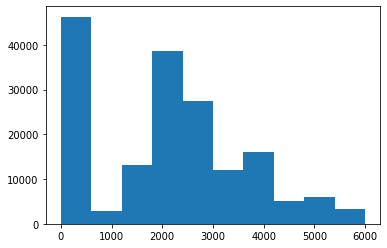

In [ ]:
plt.hist(df.land_square_feet, range=[0, 6000])

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='land_square_feet'>

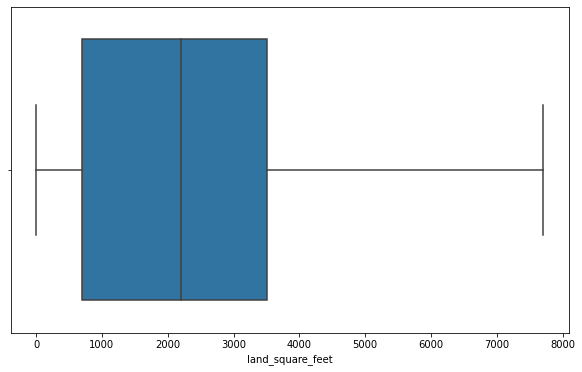

In [ ]:
# Show the data by using box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='land_square_feet', data=df,showfliers=False)

<AxesSubplot:xlabel='land_square_feet', ylabel='Density'>

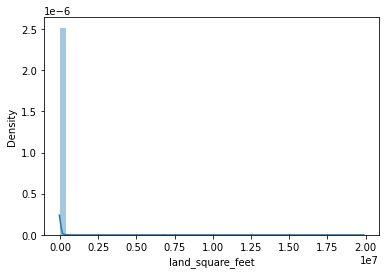

In [ ]:
# Draw the dis plot garph of this column 
sns.distplot(df.land_square_feet)

In [ ]:
sum((df.land_square_feet ==0 )& (df.gross_square_feet ==0) & (df.year_built ==0))

0

In [ ]:
# Replace the nan and 0 values in this column. The nan values will be 0 and the 0 will be the mean of this column
df['land_square_feet']=df['land_square_feet'].fillna(0)
df.land_square_feet.replace(0, int(df['land_square_feet'].mean(skipna=True)), inplace= True)

In [ ]:
# Show the sum of 0 or nan values this column.
pd.isnull(df[df.land_square_feet.isin(['0', np.nan])].land_square_feet).sum()

0

In [ ]:
# get the unique values and counts them for land_square_feet of column from the data 
df.land_square_feet.value_counts().sort_values(ascending = False)

5154.0     88573
2000.0     10832
2500.0      9726
4000.0      8918
3000.0      3647
           ...  
26375.0        1
8863.0         1
4459.0         1
5322.0         1
20375.0        1
Name: land_square_feet, Length: 10010, dtype: int64

**Finding:**
* This column contains numbers with comma. So, I removed the comma.
* This column's data type is object. So, I change it to float data type.
* This column has 0 and null values. The number of zeros are 45662. the number of null values are 42911. So, I replaced the 0 and null values to this column's mean.


**Gross Square Feet Column**

In [ ]:
# Show the sum of null values in the gross_square_feet column 
df.gross_square_feet.isna().sum()

42910

In [ ]:
# Show the sum of 0 values in the gross_square_feet column 
df.gross_square_feet.isin(['0']).sum()

41820

In [ ]:
# Show the data type of this column 
df.gross_square_feet.dtype

dtype('O')

In [ ]:
# Remove the Comma from the values in this columns 
df.gross_square_feet.replace(',', '', regex=True, inplace=True)

# Convert the data type to float of the land_square_feet column
df.gross_square_feet = pd.to_numeric(df.gross_square_feet, downcast ='signed')

(array([45110., 23826., 41365., 29805., 16959., 11444.,  4638.,  2253.,
         1693.,  1134.]),
 array([   0.,  600., 1200., 1800., 2400., 3000., 3600., 4200., 4800.,
        5400., 6000.]),
 <BarContainer object of 10 artists>)

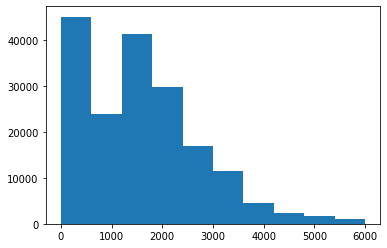

In [ ]:
plt.hist(df.gross_square_feet, range=[0, 6000])

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='gross_square_feet'>

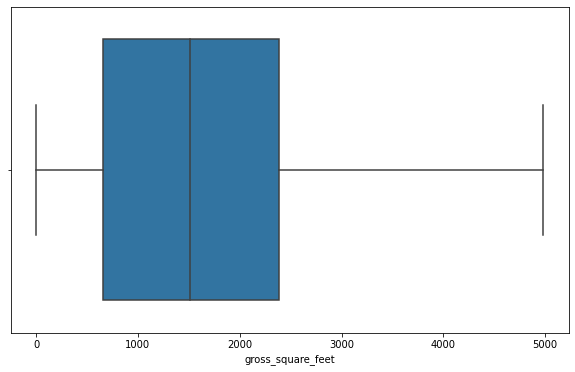

In [ ]:
# Show the data by using box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='gross_square_feet', data=df,showfliers=False)

<AxesSubplot:xlabel='gross_square_feet', ylabel='Density'>

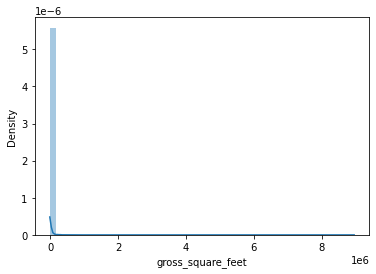

In [ ]:
# Draw the dis plot garph of this column 
sns.distplot(df.gross_square_feet)

In [ ]:
# # Replace the nan values in this column. The nan values will be the mean of this column
# df['gross_square_feet']=df['gross_square_feet'].fillna(0)

In [ ]:
# Show the sum of 0 or nan values this column.
pd.isnull(df[df.gross_square_feet.isin(['0', np.nan])].gross_square_feet).sum()

42910

In [ ]:
# get the unique values and counts them for land_square_feet of column from the data 
df.gross_square_feet.value_counts().sort_values(ascending = False)

0.0        41820
2400.0      1116
2000.0       993
1600.0       991
1800.0       930
           ...  
27588.0        1
13175.0        1
5358.0         1
5455.0         1
14040.0        1
Name: gross_square_feet, Length: 9575, dtype: int64

In [ ]:
all_gross_Null = df.loc[(df.gross_square_feet.isnull()), ['neighborhood', 'building_class_category','gross_square_feet']]
# Drop the duplicate rows in the data
all_gross_Null.drop_duplicates(inplace=True)

# all_gross_Null = all_gross_Null.reset_index() 
i = 0



for index, row in all_gross_Null.iterrows():
  i = i +1
  # print(i, "----------" , row['neighborhood'], row['building_class_category'])
  print('******************************', i, "----------" , row['neighborhood'], "----------", row['building_class_category'], '**********************************************')
  new_gross = df[(df['neighborhood'] == row['neighborhood']) & (df['building_class_category'] == row['building_class_category'])].gross_square_feet
  # new_gross.value_counts()
  

  m = pd.Series.mode(new_gross)
  print('\n **************', m.values[0] if not m.empty else np.nan)
  new_gross = m.values[0] if not m.empty else np.nan
  # df.loc[(df['neighborhood'] == row['neighborhood']) & (df['building_class_category'] == row['building_class_category']) & (df['gross_square_feet'] == np.nan), 'gross_square_feet'] = new_gross
  # df[(df['neighborhood'] == row['neighborhood']) & (df['building_class_category'] == row['building_class_category']) & (df['gross_square_feet'] == np.nan)]
  print('\n ============================================================================================ \n ============================================================================================')

# xx = df[(df['neighborhood'] == 'harlem-central') & (df['building_class_category'] == 'condo office buildings')].gross_square_feet

# m = xx.mode()
# m
# print( m.values[0] if not m.empty else np.nan)

# if xx.empty():
#   print('yes')
# else:
#   print('no')
# for i in range(len(all_gross_Null)) :
#   # i = i +1
#   print("----------" , df.loc[i, "neighborhood"], df.loc[i, "building_class_category"])

# df[(df['neighborhood'] == all_gross_Null.neighborhood) & (df['building_class_category'] == all_gross_Null.building_class_category)]
# all_gross_Null['building_class_category'].unique()

# i = 0

# for gross_neighborhood in all_gross_Null['neighborhood'].unique():
#   for gross_building in all_gross_Null['building_class_category'].unique():
#     i= i+1
#     print('******************************', i, "----------" , gross_neighborhood, "----------", gross_building, '**********************************************')

#     df[(df['neighborhood'] == gross_neighborhood) & (df['building_class_category'] == gross_building)].gross_square_feet.value_counts()
#     print('\n ============================================================================================ \n ============================================================================================')
    
#   all_gross_Null['building_class_category'].unique()
  # df[(df['neighborhood'] == gross_Null.neighborhood) & (df['building_class_category'] == gross_Null.building_class_category)]

****************************** 1 ---------- astoria ---------- coops - walkup apartments **********************************************

 ************** 0.0

****************************** 2 ---------- astoria ---------- coops - elevator apartments **********************************************

 ************** 0.0

****************************** 3 ---------- astoria ---------- condo coops **********************************************

 ************** 0.0

****************************** 4 ---------- bayside ---------- coops - walkup apartments **********************************************

 ************** 0.0

****************************** 5 ---------- bayside ---------- coops - elevator apartments **********************************************

 ************** 0.0

****************************** 6 ---------- beechhurst ---------- coops - walkup apartments **********************************************

 ************** 0.0

****************************** 7 ---------- beechhurst ----

In [ ]:
df[((df['neighborhood'] == 'travis') & (df['building_class_category'] == 'tax class 1 condos'))].gross_square_feet.unique()

array([1229., 1476., 2219., 2036., 1292.,    0.,   nan])

In [ ]:
xx = df[((df['neighborhood'] == 'travis') & (df['building_class_category'] == 'tax class 1 condos'))].gross_square_feet.mode()[0]
xx

0.0

In [ ]:
# df[((df['neighborhood'] == 'travis') & (df['building_class_category'] == 'tax class 1 condos'))].gross_square_feet.replace(1292 , 18,  regex=True, inplace=True)

In [ ]:
# df[((df['neighborhood'] == 'travis') & (df['building_class_category'] == 'tax class 1 condos'))].gross_square_feet.unique()

In [ ]:
# Show the sum of null values in the gross_square_feet column 
df.gross_square_feet.isna().sum()

42910

**Tax Class At time Of Sale Column**

In [ ]:
# get the unique values and counts them for tax_class_at_time_of_sale of column from the data 
df.tax_class_at_time_of_sale.value_counts()

1.0    118477
2.0     95255
4.0     15466
Name: tax_class_at_time_of_sale, dtype: int64

In [ ]:
df.tax_class_at_time_of_sale.dtype

dtype('float64')

**Finding:**
* This column is clean.
* This column doesn't have the null values.
* The column's data type is int.
* The most of number's repeating tax_class_at_time_of_sale in this column is 1. the number of repeating is 118477.

**Building Class At Time Of Sale Column**

In [ ]:
# Show the unique values in this column
df.building_class_at_time_of_sale.unique()

array(['A5', 'B1', 'B3', 'C0', 'C2', 'R2', 'A6', 'A1', 'A9', 'A2', 'A0',
       'B2', 'B9', 'R3', 'V0', 'V3', 'G0', 'D6', 'S3', 'S9', 'F5', 'F9',
       'G7', 'V1', 'I6', 'Q8', 'Z9', 'S1', 'S2', 'C1', 'C7', 'C3', 'D1',
       'D3', 'C6', 'D4', 'RR', 'R4', 'S5', 'S4', 'R1', 'R8', 'R9', 'O1',
       'O5', 'K1', 'K4', 'K2', 'K5', 'F4', 'R5', 'G2', 'G8', 'G1', 'E9',
       'E1', 'E2', 'RB', 'RG', 'RP', 'RK', 'RS', 'A3', 'O7', 'O2', 'P3',
       'Q7', 'Q9', 'M9', 'C5', 'A8', 'F2', 'W9', 'D7', 'D9', 'G4', 'M3',
       'M1', 'Z0', 'GW', 'W8', 'I9', 'C9', 'K7', 'W2', 'Q2', 'O8', 'H2',
       'H4', 'G9', 'G3', 'RA', 'RH', 'C4', 'F1', 'A7', 'K6', 'G6', 'P5',
       'I5', 'S0', 'Z3', 'R6', 'H9', 'HB', 'E7', 'RT', 'P9', 'P6', 'O9',
       'GU', 'I1', 'P1', 'N2', 'P8', 'P2', 'V2', 'A4', 'I3', 'M4', 'P4',
       'N9', 'W6', 'K9', 'V9', 'O3', 'K3', 'W1', 'W3', 'K8', 'Z2', 'I7',
       'Q1', 'F8', 'V6', 'D5', 'D0', 'D8', 'O6', 'O4', 'L1', 'L8', 'L2',
       'L9', 'J6', 'H3', 'H8', 'H1', 'I4', 'RW', 'H

In [ ]:
# Remove the Space from the values and remove the space in the first text in this column 
df.building_class_at_time_of_sale = df.building_class_at_time_of_sale.apply(lambda x: x.strip())

In [ ]:
# Show the unique values in this column
df.building_class_at_time_of_sale.unique()

array(['A5', 'B1', 'B3', 'C0', 'C2', 'R2', 'A6', 'A1', 'A9', 'A2', 'A0',
       'B2', 'B9', 'R3', 'V0', 'V3', 'G0', 'D6', 'S3', 'S9', 'F5', 'F9',
       'G7', 'V1', 'I6', 'Q8', 'Z9', 'S1', 'S2', 'C1', 'C7', 'C3', 'D1',
       'D3', 'C6', 'D4', 'RR', 'R4', 'S5', 'S4', 'R1', 'R8', 'R9', 'O1',
       'O5', 'K1', 'K4', 'K2', 'K5', 'F4', 'R5', 'G2', 'G8', 'G1', 'E9',
       'E1', 'E2', 'RB', 'RG', 'RP', 'RK', 'RS', 'A3', 'O7', 'O2', 'P3',
       'Q7', 'Q9', 'M9', 'C5', 'A8', 'F2', 'W9', 'D7', 'D9', 'G4', 'M3',
       'M1', 'Z0', 'GW', 'W8', 'I9', 'C9', 'K7', 'W2', 'Q2', 'O8', 'H2',
       'H4', 'G9', 'G3', 'RA', 'RH', 'C4', 'F1', 'A7', 'K6', 'G6', 'P5',
       'I5', 'S0', 'Z3', 'R6', 'H9', 'HB', 'E7', 'RT', 'P9', 'P6', 'O9',
       'GU', 'I1', 'P1', 'N2', 'P8', 'P2', 'V2', 'A4', 'I3', 'M4', 'P4',
       'N9', 'W6', 'K9', 'V9', 'O3', 'K3', 'W1', 'W3', 'K8', 'Z2', 'I7',
       'Q1', 'F8', 'V6', 'D5', 'D0', 'D8', 'O6', 'O4', 'L1', 'L8', 'L2',
       'L9', 'J6', 'H3', 'H8', 'H1', 'I4', 'RW', 'H

**Finding:**
* This column doesn't clean because some value is same but add it spaces.
* This column doesn't have the null values.
* The column's data type is object.


**Year Built Column**

In [ ]:
sum((df.land_square_feet !=0 )& (df.gross_square_feet ==0) & (df.year_built ==0))

2381

In [ ]:
zero_year_only=df[(df.gross_square_feet !=0) & (df.year_built ==0)]
zero_year_only.shape

(3999, 19)

In [ ]:
# mean_year= df.year_built.mean(skipna=True)
df.loc[ (df.gross_square_feet !=0) & (df.year_built ==0) , 'year_built'] = np.nan

**Sale Price Column**

In [ ]:
# Show the unique values in this column
df.sale_price.unique()

array(['775,000', '0', '670,000', ..., '374,868', '331,275', '873,149'],
      dtype=object)

In [ ]:
# Remove the $ from the values in this column
df.sale_price = df.sale_price.replace(',', '', regex = True).str.replace('$', '').astype(int)

In [ ]:
# Show the unique values in this column
df.sale_price.unique()

array([775000,      0, 670000, ..., 398003, 374868, 331275])

In [ ]:
df2= df[(df.sale_price >10000) & (df.sale_price <10000000)].copy()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='sale_price', ylabel='Density'>

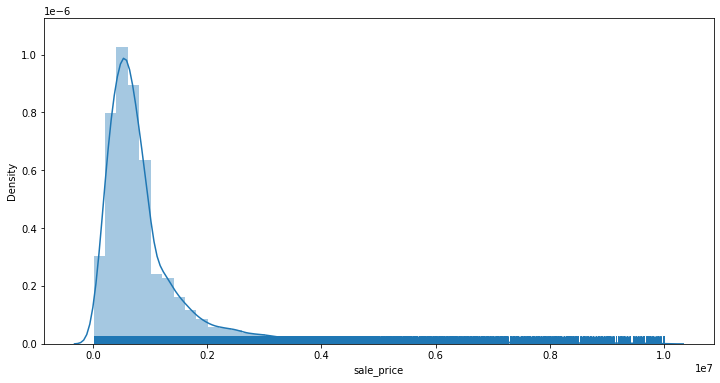

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df2.sale_price, kde=True, bins=50, rug=True)
plt.show()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='sale_price', ylabel='Density'>

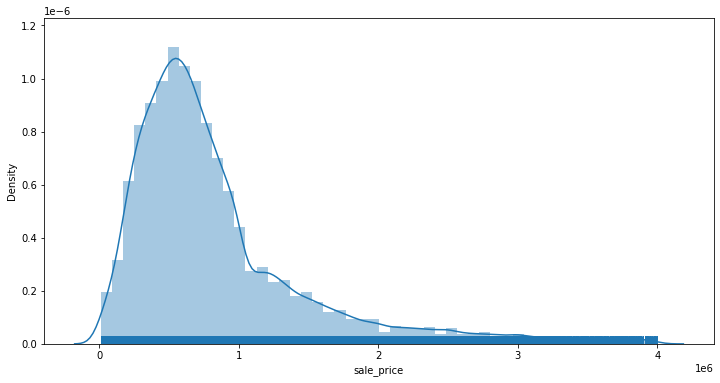

In [ ]:
df2= df2[(df2.sale_price<4000000)]
plt.figure(figsize=(12,6))
sns.distplot(df2.sale_price, kde=True, bins=50, rug=True)
plt.show()

**Finding:**
* This column doesn't clean because some value is same but add it $.
* This column doesn't have the null values.
* The column's data type is object. So, I change it to int.


**Sale Date Column**

In [ ]:
# Show the unique values in this column
df.sale_date.unique()

array(['2019-04-05', '2019-06-18', '2019-11-21', ..., '2020-03-29',
       '2020-02-16', '2020-08-02'], dtype=object)

In [ ]:
df.sale_date = pd.to_datetime(df.sale_date, errors='coerce')

In [ ]:
# Create the two column from the sale Date 
df['sale_year'] = pd.DatetimeIndex(df.sale_date).year.astype("int")
df['sale_month'] = pd.DatetimeIndex(df.sale_date).month.astype("int")
# returns a frequency of each combination by default.
pd.crosstab(df['sale_month'],df['sale_year'])

sale_year,2018,2019,2020
sale_month,,,
1,6846,6774,7301
2,6113,5851,6544
3,6989,6583,5383
4,6487,6909,3009
5,7411,7536,3806
6,7714,7905,5080
7,7193,6968,5338
8,7400,7600,4868
9,6082,6672,5763


**Finding:**
* This column cleans.
* This column doesn't have the null values.
* The column's data type is object. So, I change it to date time.
* I created the two columns from this column. they are year and month sales.


In [ ]:
# show the count of null values in the data. if the data has null values, it will return the count of null in all columns otherwise it will return 0
total_miss = df.isnull().sum()
# Calclate the persange of null values in the data
percent_miss = (total_miss/df.isnull().count()*100)

# create data frame from the total null values and percentage it
missing_data = pd.DataFrame({'Total missing':total_miss,'missing %':percent_miss})
# Sort the data frame that has the total null values and percentage it
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,missing %
gross_square_feet,42910,18.721804
commercial_units,29204,12.741821
total_units,29204,12.741821
residential_units,29204,12.741821
year_built,14263,6.223004
sale_year,0,0.000000
sale_date,0,0.000000
sale_price,0,0.000000
building_class_at_time_of_sale,0,0.000000
tax_class_at_time_of_sale,0,0.000000


In [ ]:
# define imputer
imputer = KNNImputer(n_neighbors= 11)
df[['year_built', 'residential_units', 'total_units', 'commercial_units', 'gross_square_feet']] = imputer.fit_transform(df[['year_built', 'residential_units', 'total_units', 'commercial_units', 'gross_square_feet']])

In [ ]:
# show the count of null values in the data. if the data has null values, it will return the count of null in all columns otherwise it will return 0
total_miss = df.isnull().sum()
# Calclate the persange of null values in the data
percent_miss = (total_miss/df.isnull().count()*100)

# create data frame from the total null values and percentage it
missing_data = pd.DataFrame({'Total missing':total_miss,'missing %':percent_miss})
# Sort the data frame that has the total null values and percentage it
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,missing %
borough,0,0.0
total_units,0,0.0
sale_year,0,0.0
sale_date,0,0.0
sale_price,0,0.0
building_class_at_time_of_sale,0,0.0
tax_class_at_time_of_sale,0,0.0
year_built,0,0.0
gross_square_feet,0,0.0
land_square_feet,0,0.0


In [ ]:
data = df.copy()

Task 2: Data exploration using data visualization.
Raise two questions that can be answered by performing data visualization. Briefely mention why you think this question would be interesting to whom (who is your audience). Think about the EDA principals.

Question 2.1: *What do the borough have the highest when the building class category is one family dwellings?*

Someome is interested about what is the highest borough to one family dwellings.

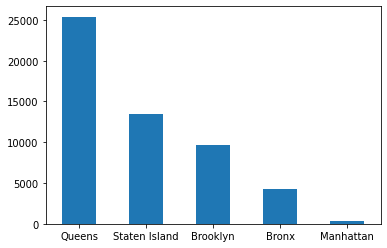

In [ ]:
ax = df[(df.building_class_category == 'one family dwellings')]['borough'].value_counts().plot.bar(rot=0)

Question 2.2: *what is the hightest borough that it has the residential units and it doesn't have commercial units?*

Some one search about borough for residential

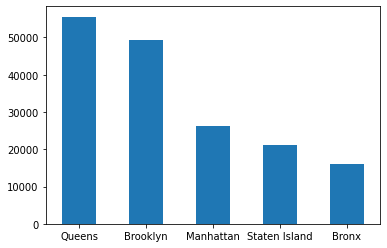

In [ ]:
ax = df[((df.residential_units != 0) & (df.commercial_units == 0))]['borough'].value_counts().plot.bar(rot=0)

Task 3: Data Exploration via Statistical Test
Raise one question that can be answered by performing hypothesis test. Briefely mention why you think this question would be interesting to whom (who is your audience). Also mention which statistical test you would choose and why.

*My Hypothsis is Do the highest building class category is condos with elevator apartments when their sale prices are two million dollar or more in the Manhattan?*

Null hypothesis: *Does the highest building class category never is condos with elevator apartments when their sale prices are two million dollar or more in the Manhattan?*

Alternative hypothesis: *Does the highest building class category  condos with elevator apartments when their sale prices are two million dollar or more in the Manhattan?*

<AxesSubplot:>

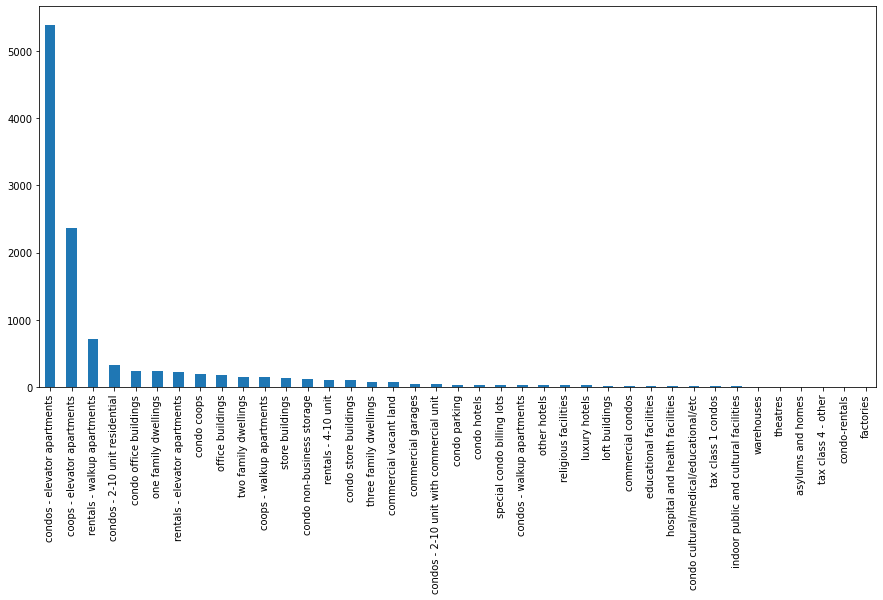

In [ ]:
df[(df.sale_price >= 2000000) & (df.borough == 'Manhattan')].building_class_category.value_counts().plot(kind='bar', figsize = (15,7))

In [ ]:
# Take copy from the data
data_fin = df.copy()

In [ ]:
data_fin.borough.value_counts()

Queens           72809
Brooklyn         64936
Manhattan        46251
Staten Island    23140
Bronx            22062
Name: borough, dtype: int64

In [ ]:
# Replace the values of borough from Manhattan, Bronx, Brooklyn, Queens and Staten Island to 1, 2, 3, 4, 5.
data_fin.borough = data_fin.borough.map({'Manhattan': 1, 'Bronx': 2, 'Brooklyn': 3, 'Queens': 4,'Staten Island': 5})

In [ ]:
data_fin.borough.value_counts()

4    72809
3    64936
1    46251
5    23140
2    22062
Name: borough, dtype: int64

In [ ]:
# # Replace the values of borough from Manhattan, Bronx, Brooklyn, Queens and Staten Island to 1, 2, 3, 4, 5.
# df.borough = df.borough.map({'Manhattan': 1, 'Bronx': 2, 'Brooklyn': 3, 'Queens': 4,'Staten Island': 5})

# List from the column's names need to Convert to numerical values
col_name = ['neighborhood', 'building_class_category', 'building_class_at_present', 'address', 'building_class_at_time_of_sale', 'sale_date'] 

le = LabelEncoder()
for i in col_name:
    data_fin[i] = le.fit_transform(data_fin[i])

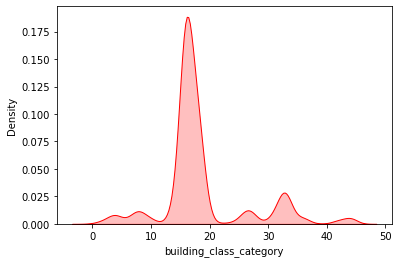

In [ ]:
ax = sns.kdeplot(data_fin[(data_fin.sale_price >= 2000000) & (data_fin.borough == 1) ].building_class_category, shade = True, color='r')

In [ ]:
ttest,pval = stats.ttest_1samp(data_fin[(data_fin.sale_price >= 2000000) & (data_fin.borough == 4) & (data_fin.building_class_category == 16)].building_class_category, 0)
print('statistic= ', ttest,'pvalue= ', pval)
if pval<0.05:
    print("Accept Alternative Hypothesis, reject null hypothesis")
else:
    print("accept null hypothesis")

statistic=  32.90999628233748 pvalue=  1.8670004336033808e-185
Accept Alternative Hypothesis, reject null hypothesis


In [ ]:
data_fin[(data_fin['SALE_PRICE'] >= 2000000) & (data_fin['BOROUGH'] == 4)  ]

Task 4: Feature Engineering. If we would like to predict the house sale price. Analyze the scale of each attribute and determine which ones you would transfer (e.g., cateogorical features). Discuss how you plan to select important features.

I will choose the 2 columns to make them Feature Engineering. they will be Size and Revenue.

**Feature Engineering:**

* **Imputation**

    * It used to prepare and clean the data 
    * Some samples may miss data for some features. We need to detect those instances and remove those samples or replace empty values with something.
    * I handled the data in the Task 1. 
   

* **Categorical Encoding**

    * Converting categorical values into numeric values.
    * I Cinverted the categorical values in Task 3.
    
      
* **Handling Outliers**

    * Sometimes these values are mistakes and wrong measurements.
    * 
   
* **Scaling**

    * In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
    * It used to normalize the range of independent variables or features of data.
    * I used the StandardScaler.

* **Feature Selection**
    * It is the process of selecting out the most significant features from a given dataset.
    * It will help you limit these features to a manageable number.
    * I used the Filter methods.

<AxesSubplot:>

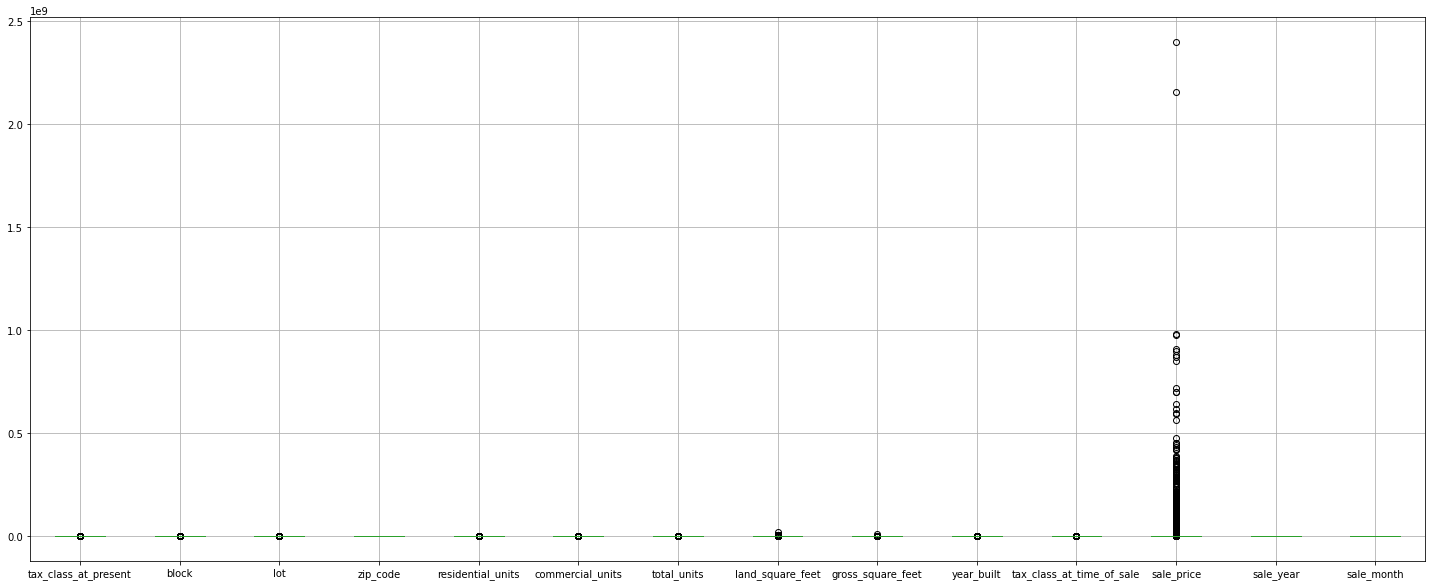

In [ ]:
# # Show the data by using box plot
# fig = plt.figure(figsize =(120,110))
 
# Creating plot
# plt.boxplot(df)
df.plot.box(grid='True',figsize=(25,10))
 
# show plot
plt.show()

In [ ]:
# Take copy from the data
df_fin = data_fin.copy()

In [ ]:
# ٍSplit the data to X (Features) and y (label)
X = df_fin.drop(['sale_price'], axis = 1)
y = df_fin.loc[:, 'sale_price']

In [ ]:
# Split X and y to X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_set = 0.2, random_state=42)

In [ ]:
# used to normalize the X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the model and train it
reg = LinearRegression()
reg = reg.fit(X_train, y_train)

In [ ]:
yhat_train = reg.predict(X_train)
sklearn.metrics.r2_score(y_train, yhat_train)
yhat_test = reg.predict(X_test)
sklearn.metrics.r2_score(y_test, yhat_test)

0.0629500118313373

0.10502781309944986

Task 5: AutoML

Using Auto-sklearn to explore performance of one state-of-the-art autoML tool on the given data (after your previous preprocessing). Optional: compare with performing autosklearn on raw data.
ref. https://automl.github.io/auto-sklearn/master/examples/20_basic/example_regression.html

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=2000,
    per_run_time_limit=1500,
)

In [ ]:
automl.fit(X_train, y_train)

[WARNING] [2022-04-26 00:41:15,108:Client-AutoML(1):92f93558-c4f9-11ec-819c-0242ac130202] Capping the per_run_time_limit to 999.0 to have time for a least 2 models in each process.


AutoSklearnRegressor(per_run_time_limit=1500, time_left_for_this_task=2000)

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight            type      cost  duration
model_id                                                           
45           1             0.10   decision_tree  0.923052  1.328079
48           2             0.08   decision_tree  0.923052  1.566979
56           3             0.10   decision_tree  0.923052  1.455675
38           4             0.02  ard_regression  0.944104  4.667861
49           5             0.46   decision_tree  0.981265  2.880594
42           6             0.24  ard_regression  1.000051  1.391634


In [ ]:
train_predictions = automl.predict(X_train)
sklearn.metrics.r2_score(y_train, train_predictions)
test_predictions = automl.predict(X_test)
sklearn.metrics.r2_score(y_test, test_predictions)

0.25244912580401113

0.24508943972192243

Text(0.5, 0, 'Predicted value')

Text(0, 0.5, 'True value')

(30.0, 400.0)

(30.0, 400.0)

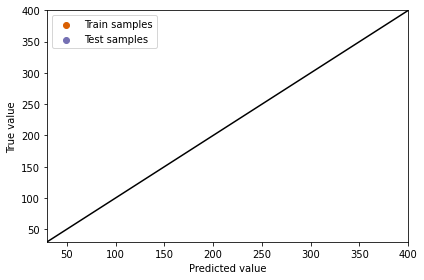

In [ ]:
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c='k', zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()